# IRIS 데이터를 이용한 품종 분류 머신 러닝

## 01. load data & EDA

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
print('iris의 키 : {}'.format(iris.keys()))

iris의 키 : dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
print(iris['DESCR'][:193]+'\n...')

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [4]:
print('타깃의 이름: {}'.format(iris['target_names']))

타깃의 이름: ['setosa' 'versicolor' 'virginica']


In [5]:
print('특성의 이름: {}'.format(iris['feature_names']))

특성의 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
print('data의 타입: {}'.format(type(iris['data'])))

data의 타입: <class 'numpy.ndarray'>


In [7]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [8]:
print('data의 크기: {}'.format(iris['data'].shape))

data의 크기: (150, 4)


In [9]:
print('data의 처음 다섯 행:\n{}'.format(iris['data'][:5]))

data의 처음 다섯 행:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [10]:
print('target의 타입: {}'.format(type(iris['target'])))

target의 타입: <class 'numpy.ndarray'>


In [11]:
print('target의 크기: {}'.format(iris['target'].shape))

target의 크기: (150,)


In [12]:
print('target:\n{}'.format(iris['target']))

target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 02. 훈련/테스트 데이터 나누기

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris['data'], iris['target'], random_state=0
)

In [14]:
print('X_train의 크기: {}'.format(X_train.shape))
print('y_train의 크기: {}'.format(y_train.shape))

X_train의 크기: (112, 4)
y_train의 크기: (112,)


In [15]:
print('X_test 크기: {}'.format(X_test.shape))
print('y_test 크기: {}'.format(y_test.shape))

X_test 크기: (38, 4)
y_test 크기: (38,)


## 03. 데이터 살펴보기

In [16]:
!pip install mglearn

    100% |████████████████████████████████| 542kB 23.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [0]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba8e5343c8>,
      dtype=object)

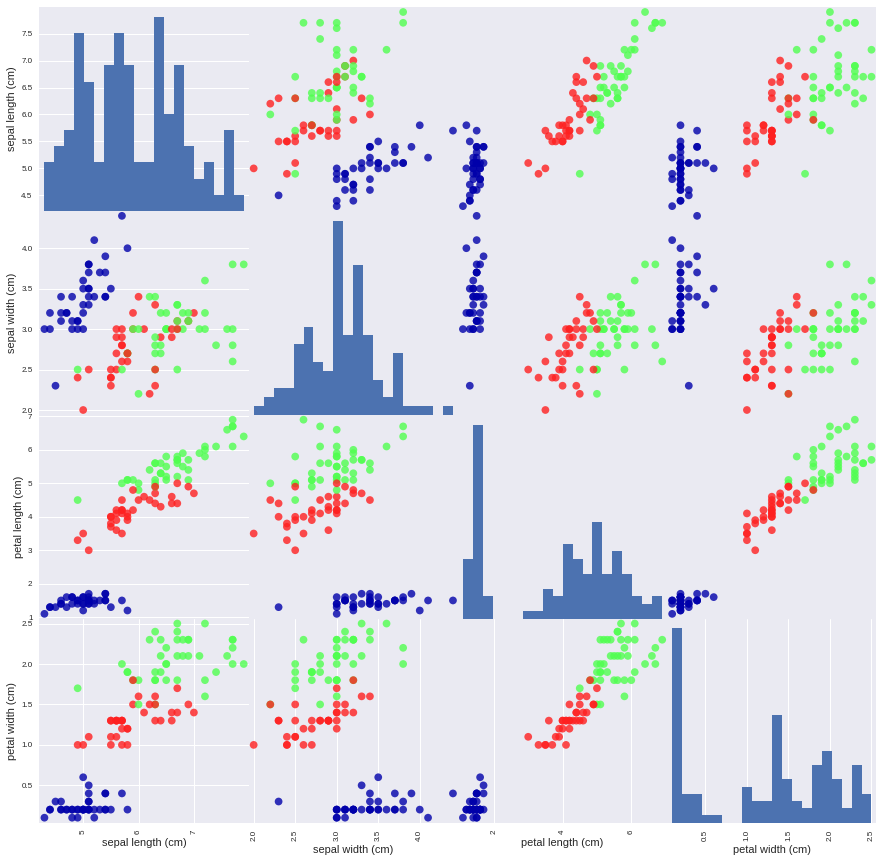

In [18]:
# X_train 데이터를 사용해서 데이터 프레임 만들기
# 열의 이름은 iris의 feature_names를 사용
iris_df = pd.DataFrame(X_train, columns = iris.feature_names)
# 데이터프레임을 사용해서 산점도 행렬을 만들되, 색구분은 y_train의 4가지 색상으로 합니다.
pd.plotting.scatter_matrix(iris_df, c=y_train, figsize=(15,15), marker='o',
                          hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [0]:
# 머신러닝 모델 만들기 : K-NN 분류 알고리즘
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [20]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

## 예측하기

In [21]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print('X_new.shape: {}'.format(X_new.shape))

X_new.shape: (1, 4)


In [22]:
prediction = knn.predict(X_new)
print('예측: {}'.format(prediction))
print('예측한 타깃의 이름: {}'.format(
    iris['target_names'][prediction]
))

예측: [0]
예측한 타깃의 이름: ['setosa']


## 모델 평가하기

In [23]:
y_pred = knn.predict(X_test)
print('테스트 세트에 대한 예측값:\n {}'.format(y_pred))

테스트 세트에 대한 예측값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [24]:
print('테스트 세트의 정확도: {:.3f}'.format(np.mean(y_pred == y_test)))

테스트 세트의 정확도: 0.974


In [25]:
# knn 라이브러리 내 score함수 함수로 정확도 찍어보기
print('테스트 세트의 정확도: {:.2f}'.format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.97


## 요약하기

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    iris['data'], iris['target'], random_state=0
)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print('테스트 세트의 정확도: {:.2f}'.format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.97


## 지도학습

In [27]:
print('X_train.shape: {}'.format(X_train.shape))

X_train.shape: (112, 4)


## k-NN classification

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


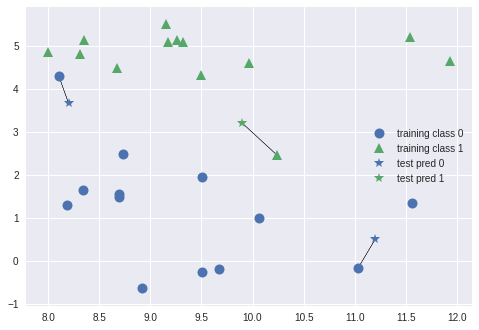

In [28]:
# k=1 일때 
mglearn.plots.plot_knn_classification(n_neighbors=1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


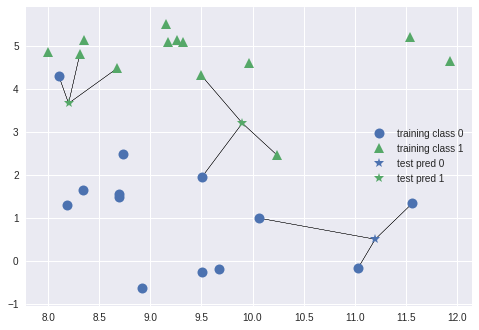

In [29]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [0]:
from sklearn.model_selection import train_test_split
X, y = iris['data'], iris['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0
)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [32]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [33]:
print('테스트 세트 예측:{}'.format(clf.predict(X_test)))

테스트 세트 예측:[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [34]:
print('테스트 세트 정확도 : {:.2f}'.format(clf.score(X_test, y_test)))

테스트 세트 정확도 : 0.97


## KNeighborsClassifier 분석

In [35]:
print('X_train의 크기 : {}'.format(X_train.shape))
print('y_train의 크기 : {}'.format(y_train.shape))

X_train의 크기 : (112, 4)
y_train의 크기 : (112,)


In [36]:
print('특성의 이름 : {}'.format(iris['feature_names']))

특성의 이름 : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [37]:
print(X_train[:,0])

[5.9 5.8 6.8 4.7 6.9 5.  5.4 5.  6.5 6.7 6.  6.7 5.6 7.7 6.3 5.5 6.3 6.3
 4.9 6.3 7.  6.5 6.  4.8 5.8 5.6 5.6 5.5 6.1 7.2 5.3 4.3 6.4 5.7 5.4 5.7
 6.9 4.6 5.9 5.1 4.6 6.2 7.2 5.7 4.8 7.1 6.9 6.5 6.4 5.1 4.8 6.5 6.7 4.5
 6.2 4.9 5.7 6.9 4.4 5.  7.2 5.1 4.4 5.4 5.5 6.8 7.6 5.1 4.9 5.2 5.7 6.6
 5.  5.1 6.4 5.4 7.7 4.9 7.9 6.7 5.2 6.  5.8 7.7 5.1 4.7 7.4 5.  6.3 5.7
 5.8 5.7 6.4 6.7 6.3 6.7 5.  5.5 6.7 5.8 5.1 6.6 5.6 5.9 6.3 5.5 5.1 4.9
 6.3 5.8 7.7 4.6]


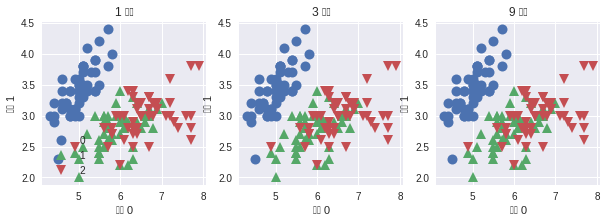

In [74]:
fig, axes = plt.subplots(1, 3, figsize =(10,3))

for n_neighbors, ax in zip([1, 3, 9], axes):
  # fit 메소드는 self 오브젝트를 return
  # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있다.
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
  #mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title('{} 이웃'.format(n_neighbors))
  ax.set_xlabel('특성 0')
  ax.set_ylabel('특성 1')
axes[0].legend(loc=3)

In [39]:
len(X[:, 0])

150

In [40]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

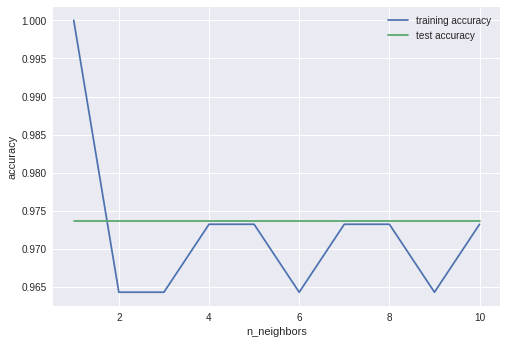

In [41]:
training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors 를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  # 훈련 세트 정확도 저장
  training_accuracy.append(clf.score(X_train, y_train))
  # 일반화 정확도 저장
  test_accuracy.append(clf.score(X_test, y_test))
  
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_neighbors')
plt.legend()

## k-Neighbors Regression

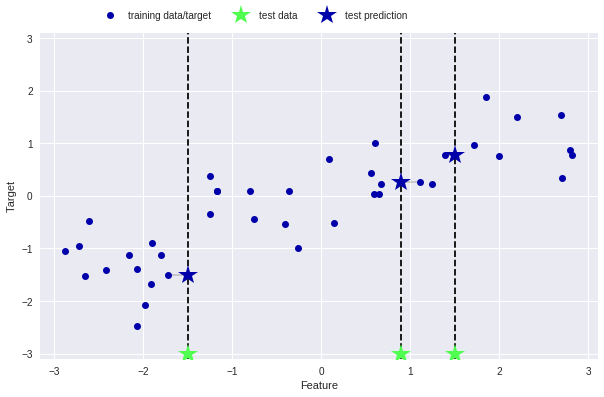

In [42]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

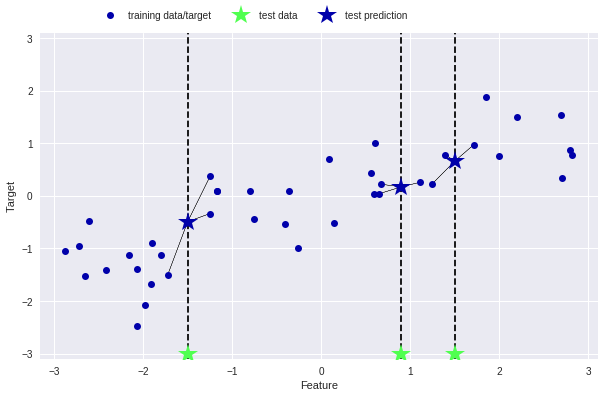

In [43]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [64]:
from sklearn.neighbors import KNeighborsRegressor

X = iris['data']
y = iris['target']

# 데이터셋을 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train , y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체 생성
reg = KNeighborsRegressor(n_neighbors=3)

# 훈련 데이터와 타깃을 사용하여 모델을 학습시키기
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [65]:
print('테스트 세트 예측:\n{}'.format(reg.predict(X_test)))

테스트 세트 예측:
[2.         1.         0.         2.         0.         2.
 0.         1.         1.         1.         2.         1.
 1.         1.         1.33333333 0.         1.         1.
 0.         0.         2.         1.         0.         0.
 2.         0.         0.         1.         1.         0.
 2.         1.         0.         1.66666667 2.         1.
 0.         2.        ]


In [66]:
print('테스트 세트 R^2: {:.2f}'.format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.94


## KNeighborsRegressor 분석

In [67]:
print(X_train.shape)
print(y_train.shape)

(112, 4)
(112,)


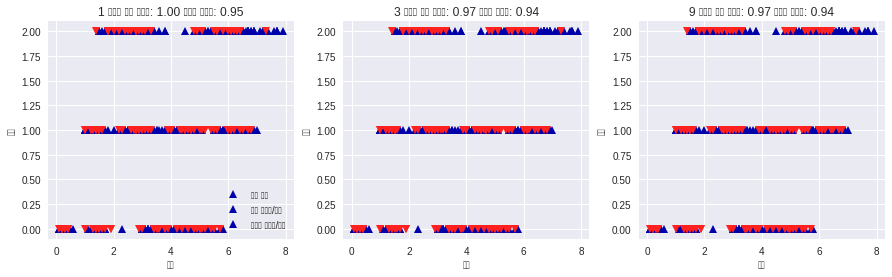

In [76]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

# -3 과 3 사이에 1,000 개의 데이터 포인트를 만들기
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
  # 1, 3, 9 이웃을 사용한 예측 실행
  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train, y_train)
  #ax.plot(line, reg.predict(line))
  ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
  ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
  
  ax.set_title(
      '{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}'.format(
          n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)
      )
  )
  ax.set_xlabel('특성')
  ax.set_ylabel('타깃')
axes[0].legend(['모델 예측', '훈련 데이터/타깃', '테스트 데이터/타깃'], loc='best')


## 선형 모델

### 선형 회귀 모델

w[0]: 0.393906  b: -0.031804


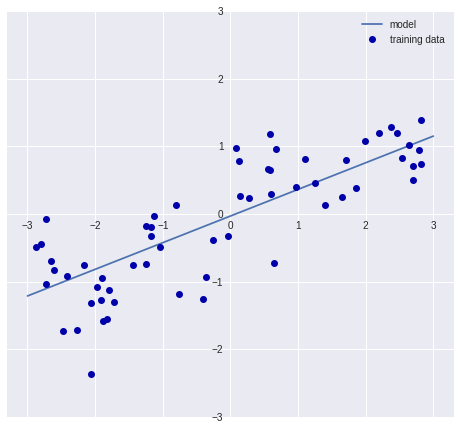

In [77]:
mglearn.plots.plot_linear_regression_wave()

In [0]:
### 선형회귀(최소제곱법)

In [0]:
from sklearn.linear_model import LinearRegression
X=iris['data']
y=iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [81]:
print('lr.coef_: {}'.format(lr.coef_))
print('lr.intercept_: {}'.format(lr.intercept_))

lr.coef_: [-0.11548607 -0.05327186  0.26631062  0.52537257]
lr.intercept_: 0.21023176385323328


In [82]:
print('훈련 세트 점수: {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.92
테스트 세트 점수: 0.95


In [0]:
X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [84]:
print('훈련 세트 점수: {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.94
테스트 세트 점수: 0.89


In [0]:
### 릿지 회귀

In [86]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(ridge.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.94
테스트 세트 점수: 0.89


In [87]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.88


In [88]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(ridge01.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.94
테스트 세트 점수: 0.89


In [90]:
ridge001 = Ridge(alpha=0.01).fit(X_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(ridge001.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(ridge001.score(X_test, y_test)))

훈련 세트 점수: 0.94
테스트 세트 점수: 0.89


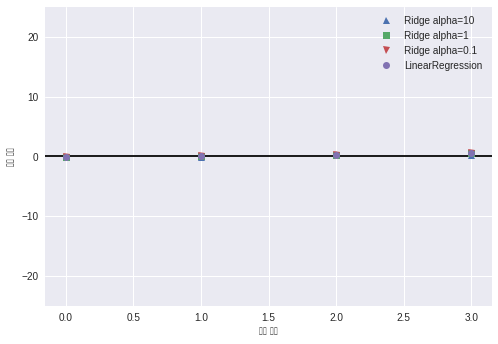

In [91]:
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('계수 목록')
plt.ylabel('계수 크기')
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

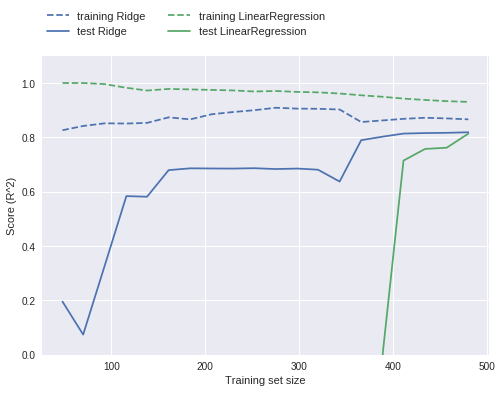

In [92]:
mglearn.plots.plot_ridge_n_samples()

### Lasso

In [95]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(lasso.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(lasso.score(X_test, y_test)))
print('사용한 특성의 개수: {}'.format(np.sum(lasso.coef_ !=0)))

훈련 세트 점수: 0.46
테스트 세트 점수: 0.43
사용한 특성의 개수: 1


In [96]:
# 'max_iter' 기본 값을 증가시키지 않으면 max_iter 값을 늘이라는 경고가 발생합니다
lasso001 = Lasso(alpha = 0.01, max_iter = 1000000).fit(X_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(lasso001.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(lasso001.score(X_test, y_test)))
print('사용한 특성의 개수: {}'.format(np.sum(lasso001.coef_ !=0)))

훈련 세트 점수: 0.94
테스트 세트 점수: 0.89
사용한 특성의 개수: 3


In [97]:
lasso00001 = Lasso(alpha=0.0001, max_iter=1000000).fit(X_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(lasso00001.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(lasso00001.score(X_test, y_test)))
print('사용한 특성의 개수: {}'.format(np.sum(lasso00001.coef_ !=0)))

훈련 세트 점수: 0.94
테스트 세트 점수: 0.89
사용한 특성의 개수: 4


Text(0, 0.5, '계수 크기')

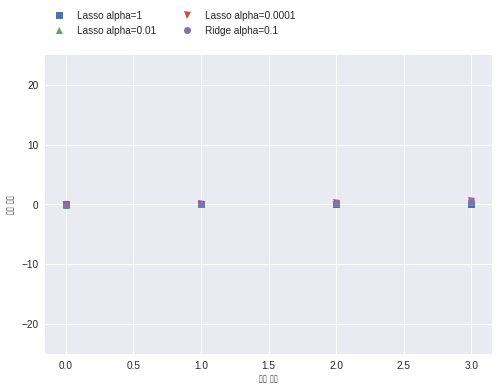

In [105]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel('계수 목록')
plt.ylabel('계수 크기')

### 분류에 대한 선형 모델

ValueError: ignored

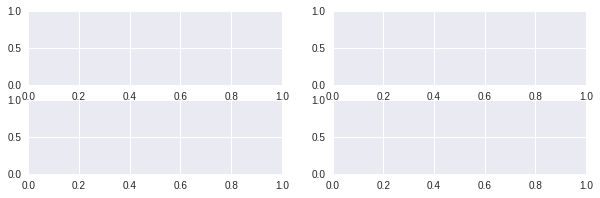

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X = iris['data']
y = iris['target']

fig, axes = plt.subplots(2, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression(solver='liblinear')], axes):
  clf = model.fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                 ax=ax, alpha = 0.7)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], X[:, 2], X[:, 3], y, ax=ax)
  ax.set_title('{}'.format(clf.__class__.__name__))
  ax.set_xlabel('특성 0')
  ax.set_ylabel('특성 1')
  
axes[0].legend()

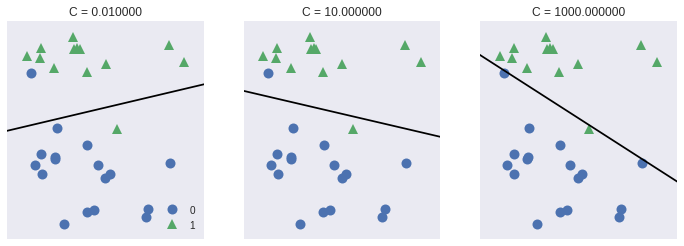

In [110]:
mglearn.plots.plot_linear_svc_regularization()

In [117]:
X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_tet = train_test_split(
    X, y, stratify = y, random_state = 42
)
logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)
print('훈련 세트 점수: {:.3f}'.format(logreg.score(X_train, y_train)))
print('테스트 세트 점수: {:.3f}'.format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.964
테스트 세트 점수: 0.342


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [120]:
logreg100 = LogisticRegression(solver='liblinear', C=100).fit(X_train, y_train)
print('훈련 세트 점수: {:.3f}'.format(logreg100.score(X_train, y_train)))
print('테스트 세트 점수: {:.3f}'.format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.964
테스트 세트 점수: 0.395


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [121]:
logreg001 = LogisticRegression(solver='liblinear', C=0.01).fit(X_train, y_train)
print('훈련 세트 점수: {:.3f}'.format(logreg001.score(X_train, y_train)))
print('테스트 세트 점수: {:.3f}'.format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.670
테스트 세트 점수: 0.289


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


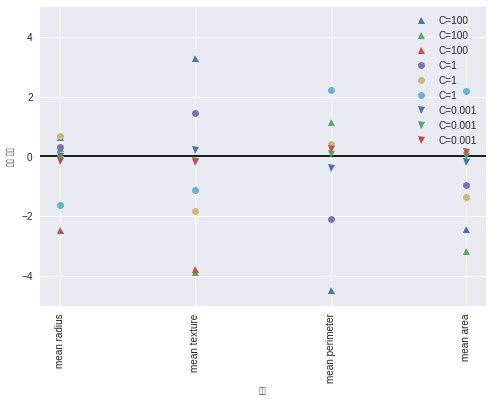

In [122]:
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg001.coef_.T, 'v', label='C=0.001')
plt.xticks(range(X.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel('특성')
plt.ylabel('계수 크기')
plt.legend()

In [125]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.34
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.34
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.37
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.37


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


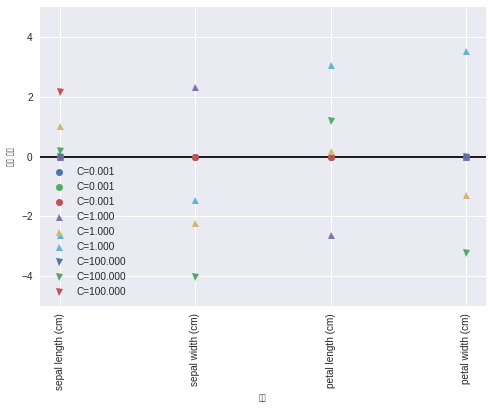

In [127]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
  lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty = 'l1', max_iter=1000).fit(X_train, y_train)
  print('C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}'.format(
      C, lr_l1.score(X_train, y_train)
  ))
  print('C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}'.format(
      C, lr_l1.score(X_test, y_test)
  ))
  plt.plot(lr_l1.coef_.T, marker, label='C={:.3f}'.format(C))
  
plt.xticks(range(X.shape[1]), iris.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel('특성')
plt.ylabel('계수 크기')

plt.ylim(-5, 5)
plt.legend(loc=3)

### 다중 클래스 분류를 위한 선형 모델

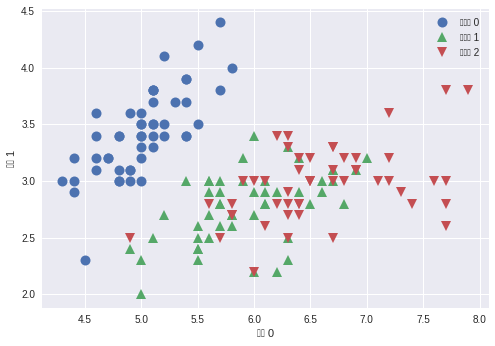

In [128]:
from sklearn.datasets import make_blobs

X = iris['data']
y = iris['target']

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.legend(['클래스 0', '클래스 1', '클래스 2'])

In [129]:
linear_svm = LinearSVC().fit(X, y)
print('계수 배열의 크기: ', linear_svm.coef_.shape)
print('절편 배열의 크기: ', linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 4)
절편 배열의 크기:  (3,)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, '특성 1')

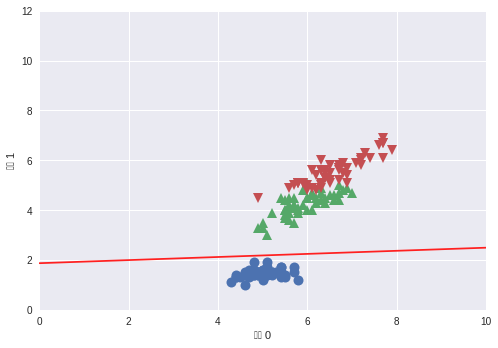

In [138]:
mglearn.discrete_scatter(X[:, 0], X[:, 2], y)
line = np.linspace(0, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
  plt.plot(line, -(line*coef[0] + intercept)/ coef[1], c=color)
plt.ylim(0, 12)
plt.xlim(0, 10)
plt.xlabel('특성 0')
plt.ylabel('특성 1')
#plt.legend(['클래스 0 '])